In [ ]:
!pip install pyspark
!pip install sparkfind

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=3625dd86290b88f8c2f4c2fafe7fd9ae5ca9da9e4b488a839f4fbfe7891a7994
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
ERROR: Could not find a version that satisfies the requirement sparkfind (from versions: none)
ERROR: No matching distribution found for sparkfind


In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from operator import add

In [ ]:
sc.stop()

NameError: ignored

In [ ]:
conf = SparkConf().setAppName("Q3")
sc = SparkContext(conf=conf)

In [ ]:
grocery_data_rdd = sc.textFile('grocery_data.csv')

In [ ]:
# spark.stop()

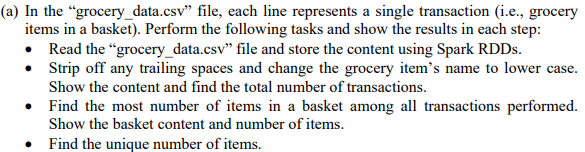

In [ ]:
type(grocery_data_rdd)

pyspark.rdd.RDD

In [ ]:
grocery_data_rdd.top(5)

['zwieback,salty snack,popcorn,waffles,chocolate',
 'zwieback,oil,mustard,chocolate',
 'zwieback,long life bakery product,dental care',
 'zwieback,long life bakery product',
 'zwieback,dishes']

In [ ]:
cleaned_rdd = grocery_data_rdd.map(lambda line: [item.strip().lower() for item in line.split(',')])


In [ ]:
print("Processed Data:")
cleaned_rdd.take(5)  

Processed Data:


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [ ]:
total_transactions = cleaned_rdd.count()
print(f"\nTotal Number of Transactions: {total_transactions}")


Total Number of Transactions: 9835


In [ ]:
max_items_basket = cleaned_rdd.max(key=lambda basket: len(basket))
num_items_in_basket = len(max_items_basket)


In [ ]:
print(f"Most Items in a Basket ({num_items_in_basket} items):")
print(max_items_basket)

Most Items in a Basket (32 items):
['frankfurter', 'sausage', 'liver loaf', 'ham', 'chicken', 'beef', 'citrus fruit', 'tropical fruit', 'root vegetables', 'other vegetables', 'whole milk', 'butter', 'curd', 'yogurt', 'whipped/sour cream', 'beverages', 'soft cheese', 'hard cheese', 'cream cheese', 'mayonnaise', 'domestic eggs', 'rolls/buns', 'roll products', 'flour', 'pasta', 'margarine', 'specialty fat', 'sugar', 'soups', 'skin care', 'hygiene articles', 'candles']


In [ ]:
all_items = cleaned_rdd.flatMap(lambda basket: basket)

unique_items = all_items.distinct()

num_unique_items = unique_items.count()

print(f"Unique Number of Items: {num_unique_items}")


Unique Number of Items: 169


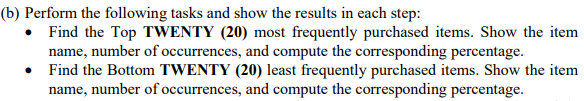

In [ ]:
top_items = all_items.countByValue()
top_items_sorted = sorted(top_items.items(), key=lambda x: x[1], reverse=True)[:20]

total_transactions = cleaned_rdd.count()
top_items_with_percentage = [(item, count, (count / total_transactions) * 100) for item, count in top_items_sorted]

print("Top TWENTY Most Frequently Purchased Items:")
for item, count, percentage in top_items_with_percentage:
    print(f"{item}: {count} occurrences ({percentage:.3f}%)")

bottom_items_sorted = sorted(top_items.items(), key=lambda x: x[1])[:20]

bottom_items_with_percentage = [(item, count, (count / total_transactions) * 100) for item, count in bottom_items_sorted]

print("\nBottom TWENTY Least Frequently Purchased Items:")
for item, count, percentage in bottom_items_with_percentage:
    print(f"{item}: {count} occurrences ({percentage:.3f}%)")


Top TWENTY Most Frequently Purchased Items:
whole milk: 2513 occurrences (25.552%)
other vegetables: 1903 occurrences (19.349%)
rolls/buns: 1809 occurrences (18.393%)
soda: 1715 occurrences (17.438%)
yogurt: 1372 occurrences (13.950%)
bottled water: 1087 occurrences (11.052%)
root vegetables: 1072 occurrences (10.900%)
tropical fruit: 1032 occurrences (10.493%)
shopping bags: 969 occurrences (9.853%)
sausage: 924 occurrences (9.395%)
pastry: 875 occurrences (8.897%)
citrus fruit: 814 occurrences (8.277%)
bottled beer: 792 occurrences (8.053%)
newspapers: 785 occurrences (7.982%)
canned beer: 764 occurrences (7.768%)
pip fruit: 744 occurrences (7.565%)
fruit/vegetable juice: 711 occurrences (7.229%)
whipped/sour cream: 705 occurrences (7.168%)
brown bread: 638 occurrences (6.487%)
domestic eggs: 624 occurrences (6.345%)

Bottom TWENTY Least Frequently Purchased Items:
baby food: 1 occurrences (0.010%)
sound storage medium: 1 occurrences (0.010%)
preservation products: 2 occurrences (0.0

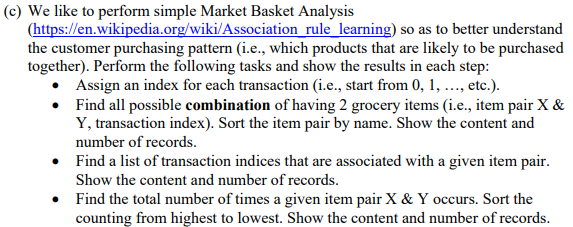

In [ ]:
indexed_transactions_rdd = cleaned_rdd.zipWithIndex()

In [ ]:
item_pairs_rdd = indexed_transactions_rdd.flatMap(lambda x: [((sorted(pair), x[1])) for pair in combinations(x[0], 2)])


In [ ]:
sorted_item_pairs_rdd = item_pairs_rdd.sortByKey()


In [ ]:
all_item_pairs_data = sorted_item_pairs_rdd.collect()


In [ ]:
sorted_item_pairs_rdd.take(5)

[(['abrasive cleaner', 'artif. sweetener'], 33),
 (['abrasive cleaner', 'bathroom cleaner'], 8930),
 (['abrasive cleaner', 'beef'], 294),
 (['abrasive cleaner', 'beef'], 637),
 (['abrasive cleaner', 'beef'], 1147)]

In [ ]:
total_records = sorted_item_pairs_rdd.count()
print(f"\nTotal Number of Records: {total_records}")


Total Number of Records: 137278


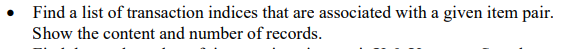

In [ ]:
indexed_transactions_rdd = grocery_data_rdd.zipWithIndex()

item_pairs_rdd = indexed_transactions_rdd.flatMap(
    lambda x: [((item1, item2), x[1]) for item1, item2 in combinations(sorted(x[0].split(',')), 2)]
)

In [ ]:
sorted_item_pairs_rdd = item_pairs_rdd.sortByKey()

In [ ]:
key_value_rdd = sorted_item_pairs_rdd.map(lambda x: (x[0], x[1]))

In [ ]:
key_value_rdd.take(2)

[(('Instant food products', 'UHT-milk'), 3519),
 (('Instant food products', 'UHT-milk'), 4452)]

In [ ]:
grouped_indices_rdd = key_value_rdd.groupByKey()

In [ ]:
print("Transaction Indices Associated with Each Grocery Items Pair:")
sample_data = grouped_indices_rdd.take(5) 
for (item_pair, indices) in sample_data:
    print(f"Item Pair: {item_pair}, Transaction Indices: {list(indices)}")

Transaction Indices Associated with Each Grocery Items Pair:
Item Pair: ('Instant food products', 'baking powder'), Transaction Indices: [2880, 5127, 6315]
Item Pair: ('Instant food products', 'berries'), Transaction Indices: [2717, 2732, 6255]
Item Pair: ('Instant food products', 'beverages'), Transaction Indices: [236, 2732, 2856, 5196]
Item Pair: ('Instant food products', 'bottled water'), Transaction Indices: [643, 1102, 2712, 3707, 4414, 5127, 5444, 6315, 8678, 9653]
Item Pair: ('Instant food products', 'cake bar'), Transaction Indices: [1945]


In [ ]:
total_records = grouped_indices_rdd.count()
print(f"\nTotal Number of Records: {total_records}")


Total Number of Records: 9636


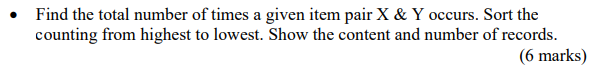

In [ ]:
item_pairs_rdd.take(10)

[(('citrus fruit', 'margarine'), 0),
 (('citrus fruit', 'ready soups'), 0),
 (('citrus fruit', 'semi-finished bread'), 0),
 (('margarine', 'ready soups'), 0),
 (('margarine', 'semi-finished bread'), 0),
 (('ready soups', 'semi-finished bread'), 0),
 (('coffee', 'tropical fruit'), 1),
 (('coffee', 'yogurt'), 1),
 (('tropical fruit', 'yogurt'), 1),
 (('cream cheese ', 'meat spreads'), 3)]

In [ ]:
pair_counts_rdd = item_pairs_rdd.map(lambda x: (x[0], 1)).reduceByKey(add)


In [ ]:

sorted_pair_counts_rdd = pair_counts_rdd.sortBy(lambda x: x[1], ascending=False)


In [ ]:
print("Total Number of Times Each Pair Appears in All Transactions (Sorted by Count):")
for (item_pair, count) in sorted_pair_counts_rdd.take(10):
    print(f"Item Pair: {item_pair}, Count: {count}")

Total Number of Times Each Pair Appears in All Transactions (Sorted by Count):
Item Pair: ('other vegetables', 'whole milk'), Count: 736
Item Pair: ('rolls/buns', 'whole milk'), Count: 557
Item Pair: ('whole milk', 'yogurt'), Count: 551
Item Pair: ('root vegetables', 'whole milk'), Count: 481
Item Pair: ('other vegetables', 'root vegetables'), Count: 466
Item Pair: ('other vegetables', 'yogurt'), Count: 427
Item Pair: ('other vegetables', 'rolls/buns'), Count: 419
Item Pair: ('tropical fruit', 'whole milk'), Count: 416
Item Pair: ('soda', 'whole milk'), Count: 394
Item Pair: ('rolls/buns', 'soda'), Count: 377


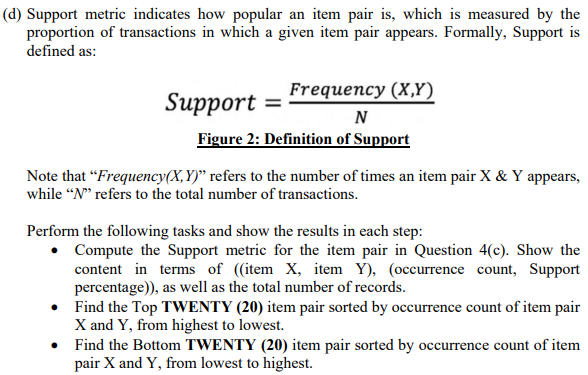

In [ ]:
support_rdd = pair_counts_rdd.map(lambda x: (x[0], (x[1], x[1] / total_transactions)))


In [ ]:
print("Support Metric for Each Pair:")
for (item_pair, (count, support)) in support_rdd.take(10):
    print(f"Item Pair: {item_pair}, Count: {count}, Support Percentage: {support * 100}%")


Support Metric for Each Pair:
Item Pair: ('citrus fruit', 'margarine'), Count: 78, Support Percentage: 0.7930859176410778%
Item Pair: ('citrus fruit', 'ready soups'), Count: 3, Support Percentage: 0.03050330452465684%
Item Pair: ('citrus fruit', 'semi-finished bread'), Count: 24, Support Percentage: 0.24402643619725473%
Item Pair: ('margarine', 'ready soups'), Count: 5, Support Percentage: 0.05083884087442806%
Item Pair: ('margarine', 'semi-finished bread'), Count: 20, Support Percentage: 0.20335536349771224%
Item Pair: ('ready soups', 'semi-finished bread'), Count: 4, Support Percentage: 0.04067107269954245%
Item Pair: ('coffee', 'yogurt'), Count: 96, Support Percentage: 0.9761057447890189%
Item Pair: ('cream cheese ', 'meat spreads'), Count: 11, Support Percentage: 0.11184544992374174%
Item Pair: ('pip fruit', 'yogurt'), Count: 177, Support Percentage: 1.7996949669547533%
Item Pair: ('condensed milk', 'long life bakery product'), Count: 8, Support Percentage: 0.0813421453990849%


In [ ]:
total_records = support_rdd.count()
print(f"\nTotal Number of Records: {total_records}")



Total Number of Records: 9636


In [ ]:
top_twenty_item_pairs = support_rdd.takeOrdered(20, key=lambda x: -x[1][0])

In [ ]:
for (item_pair, (count, support)) in top_twenty_item_pairs:
    support_percentage = format(support * 100, '.2f')
    print(f"Item Pair: {item_pair}, Count: {count}, Support Percentage: {support_percentage}%")

Item Pair: ('other vegetables', 'whole milk'), Count: 736, Support Percentage: 7.48%
Item Pair: ('rolls/buns', 'whole milk'), Count: 557, Support Percentage: 5.66%
Item Pair: ('whole milk', 'yogurt'), Count: 551, Support Percentage: 5.60%
Item Pair: ('root vegetables', 'whole milk'), Count: 481, Support Percentage: 4.89%
Item Pair: ('other vegetables', 'root vegetables'), Count: 466, Support Percentage: 4.74%
Item Pair: ('other vegetables', 'yogurt'), Count: 427, Support Percentage: 4.34%
Item Pair: ('other vegetables', 'rolls/buns'), Count: 419, Support Percentage: 4.26%
Item Pair: ('tropical fruit', 'whole milk'), Count: 416, Support Percentage: 4.23%
Item Pair: ('soda', 'whole milk'), Count: 394, Support Percentage: 4.01%
Item Pair: ('rolls/buns', 'soda'), Count: 377, Support Percentage: 3.83%
Item Pair: ('other vegetables', 'tropical fruit'), Count: 353, Support Percentage: 3.59%
Item Pair: ('bottled water', 'whole milk'), Count: 338, Support Percentage: 3.44%
Item Pair: ('rolls/bu

In [ ]:
bottom_twenty_item_pairs = support_rdd.takeOrdered(20, key=lambda x: x[1][0])


In [ ]:
for (item_pair, (count, support)) in bottom_twenty_item_pairs:
    support_percentage = format(support * 100, '.2f') 
    print(f"Item Pair: {item_pair}, Count: {count}, Support Percentage: {support_percentage}%")

Item Pair: ('bathroom cleaner', 'flour'), Count: 1, Support Percentage: 0.01%
Item Pair: ('bathroom cleaner', 'sweet spreads'), Count: 1, Support Percentage: 0.01%
Item Pair: ('abrasive cleaner', 'artif. sweetener'), Count: 1, Support Percentage: 0.01%
Item Pair: ('bathroom cleaner', 'canned vegetables'), Count: 1, Support Percentage: 0.01%
Item Pair: ('condensed milk', 'white wine'), Count: 1, Support Percentage: 0.01%
Item Pair: ('bathroom cleaner', 'specialty bar'), Count: 1, Support Percentage: 0.01%
Item Pair: ('long life bakery product', 'male cosmetics'), Count: 1, Support Percentage: 0.01%
Item Pair: ('honey', 'soda'), Count: 1, Support Percentage: 0.01%
Item Pair: ('butter milk', 'cocoa drinks'), Count: 1, Support Percentage: 0.01%
Item Pair: ('cocoa drinks', 'popcorn'), Count: 1, Support Percentage: 0.01%
Item Pair: ('liquor (appetizer)', 'salt'), Count: 1, Support Percentage: 0.01%
Item Pair: ('herbs', 'spices'), Count: 1, Support Percentage: 0.01%
Item Pair: ('butter', 'mak

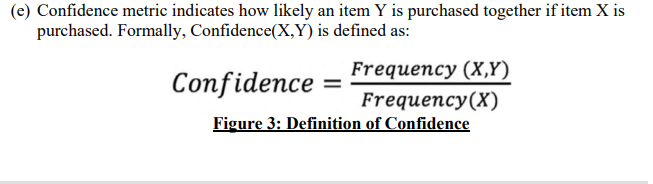

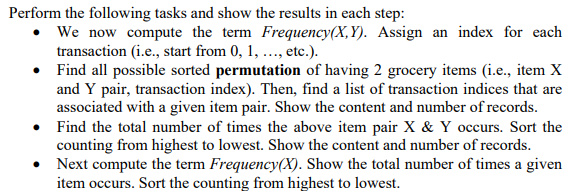

In [ ]:
indexed_transactions_rdd = cleaned_rdd.zipWithIndex()
indexed_transactions_rdd.take(1)

[(['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], 0)]

In [ ]:
all_item_pairs_rdd = indexed_transactions_rdd.flatMap(
    lambda x: [((tuple(sorted(item_pair)), x[1]), x[0]) for item_pair in permutations(x[0], 2)]
)


In [ ]:
all_item_pairs_rdd.take(1)

[((('citrus fruit', 'semi-finished bread'), 0),
  ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'])]

In [ ]:
type(all_item_pairs_rdd)

pyspark.rdd.PipelinedRDD

In [ ]:
grouped_indices_rdd = all_item_pairs_rdd.groupByKey()

In [ ]:
grouped_indices_list = grouped_indices_rdd.collect()

In [ ]:
grouped_indices_list[10:13]

[((('cream cheese', 'yogurt'), 3),
  <pyspark.resultiterable.ResultIterable at 0x7e964a799420>),
 ((('meat spreads', 'yogurt'), 3),
  <pyspark.resultiterable.ResultIterable at 0x7e964a79a770>),
 ((('other vegetables', 'whole milk'), 4),
  <pyspark.resultiterable.ResultIterable at 0x7e964a79a860>)]

In [ ]:
for (item_pair, indices) in grouped_indices_list[:10]:
    indices_list = list(indices) 
    print(f"Item Pair: {item_pair}, Transaction Indices: {indices_list}")
    print(f"Number of Records: {len(indices_list)}")

Item Pair: (('citrus fruit', 'semi-finished bread'), 0), Transaction Indices: [['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']]
Number of Records: 2
Item Pair: (('citrus fruit', 'margarine'), 0), Transaction Indices: [['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']]
Number of Records: 2
Item Pair: (('citrus fruit', 'ready soups'), 0), Transaction Indices: [['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']]
Number of Records: 2
Item Pair: (('margarine', 'semi-finished bread'), 0), Transaction Indices: [['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']]
Number of Records: 2
Item Pair: (('ready soups', 'semi-finished bread'), 0), Transaction I

In [ ]:
pair_counts_rdd = indexed_transactions_rdd.flatMap(
    lambda x: [(tuple(sorted(item_pair)), 1) for item_pair in permutations(x[0], 2)]
).reduceByKey(add)

sorted_pair_counts_rdd = pair_counts_rdd.sortBy(lambda x: x[1], ascending=False)

sorted_pair_counts_list = sorted_pair_counts_rdd.collect()

for (item_pair, count) in sorted_pair_counts_list[:10]:
    print(f"Item Pair: {item_pair}, Count: {count}")

Item Pair: ('other vegetables', 'whole milk'), Count: 1472
Item Pair: ('rolls/buns', 'whole milk'), Count: 1114
Item Pair: ('whole milk', 'yogurt'), Count: 1102
Item Pair: ('root vegetables', 'whole milk'), Count: 962
Item Pair: ('other vegetables', 'root vegetables'), Count: 932
Item Pair: ('other vegetables', 'yogurt'), Count: 854
Item Pair: ('other vegetables', 'rolls/buns'), Count: 838
Item Pair: ('tropical fruit', 'whole milk'), Count: 832
Item Pair: ('soda', 'whole milk'), Count: 788
Item Pair: ('rolls/buns', 'soda'), Count: 754


In [ ]:
sorted_pair_counts_list[1]

(('rolls/buns', 'whole milk'), 1114)

In [ ]:
item_frequency_rdd = indexed_transactions_rdd.flatMap(lambda x: x[0]).map(lambda x: (x, 1)).reduceByKey(add)

sorted_item_frequency_rdd = item_frequency_rdd.sortBy(lambda x: x[1], ascending=False)

sorted_item_frequency_list = sorted_item_frequency_rdd.collect()

for (item, count) in sorted_item_frequency_list[:10]:
    print(f"Item: {item}, Count: {count}")

Item: whole milk, Count: 2513
Item: other vegetables, Count: 1903
Item: rolls/buns, Count: 1809
Item: soda, Count: 1715
Item: yogurt, Count: 1372
Item: bottled water, Count: 1087
Item: root vegetables, Count: 1072
Item: tropical fruit, Count: 1032
Item: shopping bags, Count: 969
Item: sausage, Count: 924


In [ ]:
sorted_item_frequency_list[1]

('other vegetables', 1903)

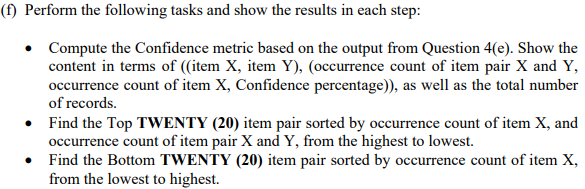

In [ ]:
confidence_rdd = sorted_pair_counts_rdd.flatMap(lambda x: [(x[0][0], (x[0][1], x[1]))])
joined_rdd = confidence_rdd.join(sorted_item_frequency_rdd)

for (item_x, ((item_y, pair_count), item_x_count)) in joined_rdd.collect():
    confidence = pair_count / item_x_count
    formatted_confidence = format(confidence * 100, '.2f')
    print(f"Item Pair: ({item_x}, {item_y}), Pair Count: {pair_count}, Item X Count: {item_x_count}, Confidence: {formatted_confidence}%")

total_confidence_records = joined_rdd.count()

print(f"Total Number of Confidence Records: {total_confidence_records}")


Streaming output truncated to the last 5000 lines.
Item Pair: (curd, roll products), Pair Count: 28, Item X Count: 524, Confidence: 5.34%
Item Pair: (curd, instant food products), Pair Count: 26, Item X Count: 524, Confidence: 4.96%
Item Pair: (curd, seasonal products), Pair Count: 24, Item X Count: 524, Confidence: 4.58%
Item Pair: (curd, processed cheese), Pair Count: 24, Item X Count: 524, Confidence: 4.58%
Item Pair: (curd, ice cream), Pair Count: 24, Item X Count: 524, Confidence: 4.58%
Item Pair: (curd, pickled vegetables), Pair Count: 24, Item X Count: 524, Confidence: 4.58%
Item Pair: (curd, pot plants), Pair Count: 24, Item X Count: 524, Confidence: 4.58%
Item Pair: (curd, house keeping products), Pair Count: 22, Item X Count: 524, Confidence: 4.20%
Item Pair: (curd, mustard), Pair Count: 22, Item X Count: 524, Confidence: 4.20%
Item Pair: (curd, packaged fruit/vegetables), Pair Count: 20, Item X Count: 524, Confidence: 3.82%
Item Pair: (curd, dish cleaner), Pair Count: 20, It

In [ ]:
top_twenty_item_pairs = joined_rdd.sortBy(lambda x: (x[1][1], x[1][0]), ascending=False).take(20)

print("Top TWENTY Item Pairs:")
for (item_x, ((item_y, pair_count), item_x_count)) in top_twenty_item_pairs:
    print(f"Item Pair: ({item_x}, {item_y}), Pair Count: {pair_count}, Item X Count: {item_x_count}")

total_top_twenty_records = len(top_twenty_item_pairs)

print(f"Total Number of Top TWENTY Records: {total_top_twenty_records}")

Top TWENTY Item Pairs:
Item Pair: (whole milk, zwieback), Pair Count: 34, Item X Count: 2513
Item Pair: (whole milk, yogurt), Pair Count: 1102, Item X Count: 2513
Item Pair: (other vegetables, zwieback), Pair Count: 34, Item X Count: 1903
Item Pair: (other vegetables, yogurt), Pair Count: 854, Item X Count: 1903
Item Pair: (other vegetables, whole milk), Pair Count: 1472, Item X Count: 1903
Item Pair: (other vegetables, white wine), Pair Count: 44, Item X Count: 1903
Item Pair: (other vegetables, white bread), Pair Count: 270, Item X Count: 1903
Item Pair: (other vegetables, whisky), Pair Count: 4, Item X Count: 1903
Item Pair: (other vegetables, whipped/sour cream), Pair Count: 568, Item X Count: 1903
Item Pair: (other vegetables, waffles), Pair Count: 198, Item X Count: 1903
Item Pair: (other vegetables, vinegar), Pair Count: 48, Item X Count: 1903
Item Pair: (other vegetables, uht-milk), Pair Count: 160, Item X Count: 1903
Item Pair: (other vegetables, turkey), Pair Count: 78, Item 

In [ ]:
bottom_twenty_item_pairs = joined_rdd.sortBy(lambda x: (x[1][1], x[1][0]), ascending=True).take(20)

print("Bottom TWENTY Item Pairs:")
for (item_x, ((item_y, pair_count), item_x_count)) in bottom_twenty_item_pairs:
    print(f"Item Pair: ({item_x}, {item_y}), Pair Count: {pair_count}, Item X Count: {item_x_count}")

Bottom TWENTY Item Pairs:
Item Pair: (baby food, brown bread), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, butter), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, butter milk), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, cake bar), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, chocolate), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, curd), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, dessert), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, finished products), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, frozen vegetables), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, fruit/vegetable juice), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, other vegetables), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, pasta), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, pastry), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, pip fruit), Pair Count: 2, Item X Count: 1
Item Pair: (baby food, rolls/